In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
va_filtered_listings = pd.read_csv("va_filtered_listings.csv")

# Display the first few rows
va_filtered_listings.head()

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,5/1/2019,7/31/2019,90,zip code,2,9670,f,Zip Code: 24244,NaN,Virginia,...,0.100000,NaN,NaN,NaN,0.100000,0.000000,0.100000,"Kingsport, TN",28700,2/10/2025 14:21
1,6/1/2022,8/31/2022,90,zip code,2,9223,f,Zip Code: 23235,NaN,Virginia,...,0.037794,NaN,NaN,NaN,0.680272,-0.059373,-0.023216,"Richmond, VA",40060,2/10/2025 14:21
2,9/1/2024,11/30/2024,90,zip code,2,9824,f,Zip Code: 24563,NaN,Virginia,...,-0.716667,NaN,NaN,NaN,0.375000,-0.069444,0.000000,"Danville, VA",19260,2/10/2025 14:21
3,8/1/2018,10/31/2018,90,zip code,2,7894,f,Zip Code: 20187,NaN,Virginia,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,"Washington, DC",47894,2/10/2025 14:21
4,11/1/2022,1/31/2023,90,zip code,2,9224,f,Zip Code: 23236,NaN,Virginia,...,-0.084934,NaN,NaN,NaN,0.452830,-0.032464,-0.188679,"Richmond, VA",40060,2/10/2025 14:21


In [4]:
# Ensure 'period_begin' is a datetime object
va_filtered_listings['period_begin'] = pd.to_datetime(va_filtered_listings['period_begin'], errors='coerce')

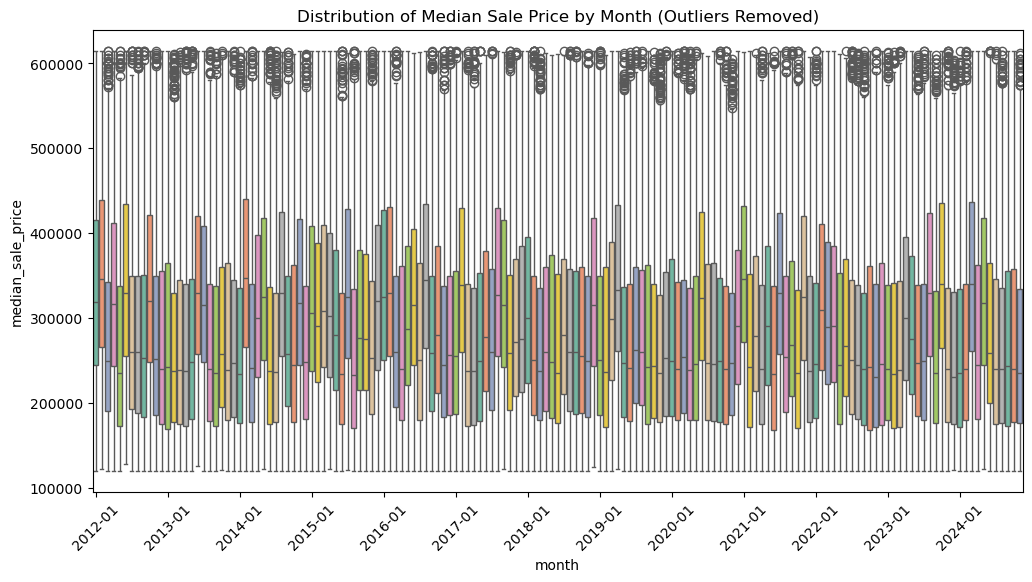

In [12]:
# Calculate the 1st and 99th percentiles for median_sale_price
sale_price_lower = va_filtered_listings['median_sale_price'].quantile(0.1)
sale_price_upper = va_filtered_listings['median_sale_price'].quantile(0.9)

# Filter the data to exclude outliers
filtered_data = va_filtered_listings[
    (va_filtered_listings['median_sale_price'] >= sale_price_lower) & 
    (va_filtered_listings['median_sale_price'] <= sale_price_upper)
]

# Create the boxplot for Median Sale Price by Month with hue as 'month'
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='median_sale_price', data=filtered_data, hue='month', palette='Set2')

# Add title and labels
plt.title('Distribution of Median Sale Price by Month (Outliers Removed)')
plt.xticks(rotation=45)

# Show only every 12th month on the x-axis
plt.xticks(ticks=range(0, len(filtered_data['month'].unique()), 12),
           labels=sorted(filtered_data['month'].unique())[::12])

# Display the plot
plt.show()

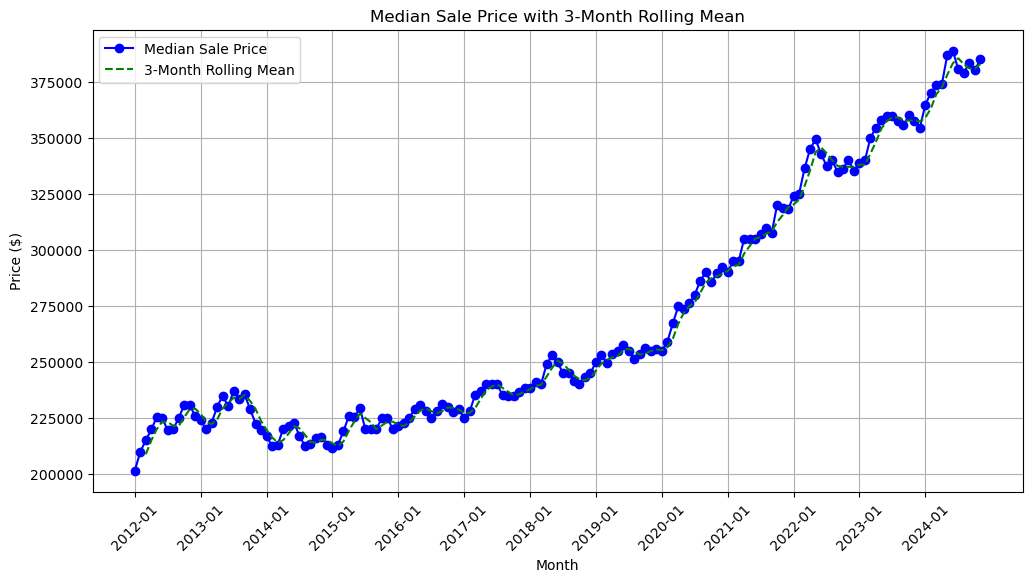

In [6]:
# First, we group by month and calculate the median sale price for each month
va_filtered_listings['month'] = va_filtered_listings['period_begin'].dt.to_period('M')
monthly_data = va_filtered_listings.groupby('month')['median_sale_price'].median()

# Now calculate the 3-month rolling mean on the monthly data
monthly_data_rolling = monthly_data.rolling(window=3).mean()

# Plot the median sale price and the 3-month rolling mean
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index.astype(str), monthly_data, label='Median Sale Price', marker='o', color='b')
plt.plot(monthly_data.index.astype(str), monthly_data_rolling, label='3-Month Rolling Mean', color='g', linestyle='--')

# Title and labels
plt.title('Median Sale Price with 3-Month Rolling Mean')
plt.xlabel('Month')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)

# Show only every 12th month on the x-axis
plt.xticks(ticks=range(0, len(monthly_data), 12),
           labels=[str(month) for month in monthly_data.index[::12]])

# Show grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

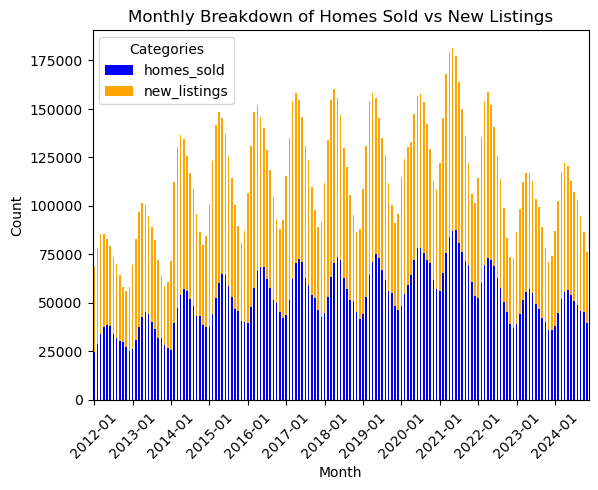

In [8]:
# Group by month and sum homes sold and new listings
monthly_stats = va_filtered_listings.groupby('month')[['homes_sold', 'new_listings']].sum()

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
monthly_stats.plot(kind='bar', stacked=True, color=['blue', 'orange'])

# Add title and labels
plt.title('Monthly Breakdown of Homes Sold vs New Listings')
plt.xlabel('Month')
plt.ylabel('Count')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show only every 12th month on the x-axis
plt.xticks(ticks=range(0, len(monthly_stats), 12),
           labels=[str(month) for month in monthly_stats.index[::12]])

# Display the legend
plt.legend(title='Categories')

# Show the plot
plt.show()

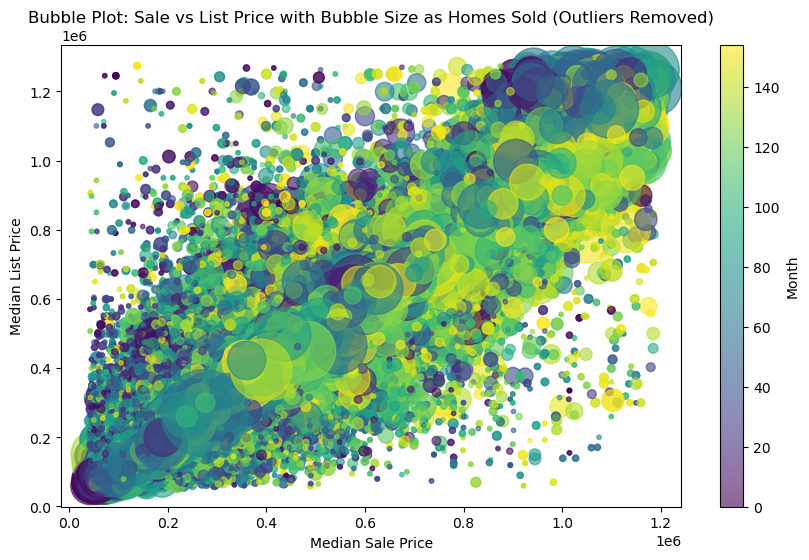

In [10]:
# Calculate the 1st and 99th percentiles for both sale and list price
sale_price_lower = va_filtered_listings['median_sale_price'].quantile(0.01)
sale_price_upper = va_filtered_listings['median_sale_price'].quantile(0.99)
list_price_lower = va_filtered_listings['median_list_price'].quantile(0.01)
list_price_upper = va_filtered_listings['median_list_price'].quantile(0.99)

# Filter the data to exclude outliers
filtered_data = va_filtered_listings[
    (va_filtered_listings['median_sale_price'] >= sale_price_lower) & 
    (va_filtered_listings['median_sale_price'] <= sale_price_upper) &
    (va_filtered_listings['median_list_price'] >= list_price_lower) & 
    (va_filtered_listings['median_list_price'] <= list_price_upper)
]

# Plot the bubble plot without outliers
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['median_sale_price'], filtered_data['median_list_price'],
            s=filtered_data['homes_sold'] * 10, c=filtered_data['month'].astype('category').cat.codes, cmap='viridis', alpha=0.6)
plt.title('Bubble Plot: Sale vs List Price with Bubble Size as Homes Sold (Outliers Removed)')
plt.xlabel('Median Sale Price')
plt.ylabel('Median List Price')
plt.colorbar(label='Month')
plt.show()